Team Details:
Member 1 Name: Vaibhav Khamesra
Member 2 Name: Ronit Gupta
Member 1 Roll Number: 21UCS224
Member 2 Roll Number: 21UCS173

We are trying to create a model which predicts the Salinity of Ocean (in gram of salt per Kg of Water) given its Temperature in degree Celsius

In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import math

Extracting data from the CSV File

In [2]:
with open('final-data-train.csv','r') as datafile:
    reader = csv.reader(datafile)
    data = list(reader)

print("Number of data points we have: ",len(data)-1)
x = []
y = []


for i in range(1,len(data)):
    x.append(data[i][0])
    y.append(data[i][1])

x = np.array(x,dtype=float)
y = np.array(y,dtype=float)

Number of data points we have:  1000


Plotting the scatter plot to find the correlation between data

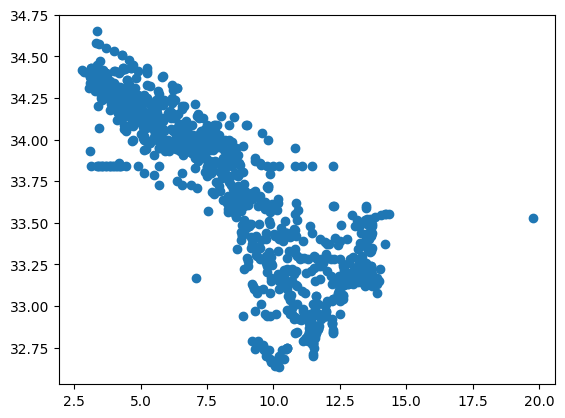

<Figure size 640x480 with 0 Axes>

In [3]:
plt.scatter(x,y)
plt.show()
plt.savefig("linear_regression_plot.jpg")

In [4]:
data_size = len(x)
sigma_y = 0
sigma_x = 0
sigma_xy = 0
sigma_x2 = 0

for i in range(data_size):
    sigma_y += y[i]
    sigma_x += x[i]
    sigma_xy += x[i]*y[i]
    sigma_x2 += x[i]*x[i]

In [5]:
w0 = (sigma_y*sigma_x2 - sigma_x*sigma_xy)/(data_size*sigma_x2 - sigma_x*sigma_x)
w1 = (data_size*sigma_xy - sigma_x*sigma_y)/(data_size*sigma_x2 - sigma_x*sigma_x)
print("w0 is ",w0)
print("w1 is ",w1)

w0 is  34.767842230515186
w1 is  -0.13007590304899688


Calculating w0 and w1 through Gradient Descent

In [15]:
def grad_desc(x,y):
    m_curr = b_curr = 0
    iterations = 5000
    n = len(x)
    learning_rate = 0.01
    for i in range(iterations):
        y_pred = m_curr*x + b_curr
        md = -(2/n)*sum(x*(y-y_pred))
        bd = -(2/n)*sum(y-y_pred)
        cost = (1/(2*n))*sum([val**2 for val in (y-y_pred)])
        m_curr = m_curr - learning_rate*md
        b_curr = b_curr - learning_rate*bd
        #print("m:{}, b:{}, cost:{}, iteration{} ".format(m_curr,b_curr,cost,i))
    return [m_curr,b_curr]

equation = grad_desc(x,y)
w0 = equation[1]
w1 = equation[0]
print("w0 is ",w0)
print("w1 is ",w1)

w0 is  34.76774269868025
w1 is  -0.13006557976744892


In [6]:
y_pred = []
for i in range(len(x)):
    y_pred.append(w1*x[i] + w0)
    
y_pred =np.array(y_pred,dtype=float)

Sum of Squared Regression

In [7]:
sum_squared_regression = 0
expectation_y = sigma_y/data_size

for i in range(len(x)):
    sum_squared_regression += math.pow((y_pred[i] - expectation_y),2)

print(sum_squared_regression)

176.97231197067367


Sum of Squared Error

In [8]:
sum_squared_error = 0

for i in range(data_size):
    sum_squared_error += math.pow(y[i] - y_pred[i],2)

print(sum_squared_error)

75.08543125511801


Sum of Squared total, it is the Sum of squared Regression + Sum of Squared Error

In [9]:
sum_squared_total = 0

for i in range(data_size):
    sum_squared_total += math.pow(y[i] - expectation_y,2)

print(sum_squared_total)

252.0577432255579
